In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.sparse import coo_matrix
import os

In [33]:
train_data=pd.read_csv(r"C:\Users\DELL\Downloads\dataforibmproject.tsv",sep="\t")
train_data.columns 

Index(['Uniq Id', 'Crawl Timestamp', 'Dataset Origin', 'Product Id',
       'Product Barcode', 'Product Company Type Source',
       'Product Brand Source', 'Product Brand Normalised Source',
       'Product Name Source', 'Match Rank', 'Match Score', 'Match Type',
       'Retailer', 'Product Category', 'Product Brand', 'Product Name',
       'Product Price', 'Sku', 'Upc', 'Product Url', 'Market',
       'Product Description', 'Product Currency',
       'Product Available Inventory', 'Product Image Url',
       'Product Model Number', 'Product Tags', 'Product Contents',
       'Product Rating', 'Product Reviews Count', 'Bsr', 'Joining Key'],
      dtype='object')

In [34]:
train_data

,Uniq Id,Crawl Timestamp,Dataset Origin,Product Id,Product Barcode,Product Company Type Source,Product Brand Source,Product Brand Normalised Source,Product Name Source,Match Rank,...,Product Currency,Product Available Inventory,Product Image Url,Product Model Number,Product Tags,Product Contents,Product Rating,Product Reviews Count,Bsr,Joining Key
0,1705736792d82aa2f2d3caf1c07c53f4,2020-09-24 03:21:12 +0000,NaN,2e17bf4acecdece67fc00f07ad62c910,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",NaN,NaN,NaN,NaN,81350af1be98d3753cf964709f0c766a
1,95a9fe6f4810fcfc7ff244fd06784f11,2020-10-30 14:04:08 +0000,NaN,076e5854a62dd283c253d6bae415af1f,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,NaN,"Nice 'n Easy Permanent Color, 111 Natural Medi...",NaN,NaN,NaN,NaN,0353e63907dc0de0c734db4690300057
2,8d4d0330178d3ed181b15a4102b287f2,2020-08-06 05:51:47 +0000,NaN,8a4fe5d9c7a6ed26cc44d785a454b124,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,NaN,Clairol Nice 'N Easy Permanent Color 7/106A Na...,NaN,4.5,29221.0,NaN,b6985c8e94815fbca2319dbb8bf228af
3,fddc4df45b35efd886794b261f730c51,2020-07-15 11:22:04 +0000,NaN,03b5fb878a33eadff8b033419eab9669,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/25b4b467-bc61...,NaN,"Kokie Professional Matte Lipstick, Hot Berry, ...",NaN,NaN,NaN,NaN,85b70fded09186f00467cea2f935b779
4,0990cf89a59ca6a0460349a3e4f51d42,2020-11-26T12:27:20+00:00,NaN,ce3d761e57d6ccad80619297b5b1bcbc,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/1a2ebb06-cd01...,NaN,"Gillette TRAC II Plus Razor Blade Refills, Fit...",NaN,NaN,131.0,NaN,41c870871328e97da6fb036bb7d4b2da
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2771f0606e9638de508741f52029d51c,2020-07-21 19:00:03 +0000,NaN,ad208aa8da338e84dfcf13efd49e8a75,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/0e0416ae-6b70...,NaN,"Garden Mint Room Spray (Double Strength), 4 ou...",NaN,4.5,2.0,NaN,30ffe1476e6289c474ab1c08e503be4b
4996,0f218eb3ac736975ccfdde987baa4b83,2020-07-01 05:45:18 +0000,NaN,1be8241fd6249f7ee007b06afd7ff45d,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/24d7a837-51f8...,NaN,Garnier Nutrisse Nourishing Hair Color Creme (...,NaN,3.9,7484.0,NaN,dad7562b7fb37c2f2eaf07644f0a8702
4997,34d1aa70845416c3df059a088aaf18dc,2020-12-01T02:02:32+00:00,NaN,96ed378fb9466b11abde8f9baea58844,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/d6202179-2c93...,NaN,"Nail File Electric Drill, 6 in 1 Professional ...",NaN,NaN,4.0,NaN,acf460a46f2b2967ee0b0a9ae3eff7dc
4998,ff9cfa22550bf036e2487a9100d927f1,2020-10-20 21:29:05 +0000,NaN,f7b05869f3ee7fe22864ea58cbb006d1,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/3dc99239-66d2...,NaN,Creed Love In Black Hair And Body Wash 6.8oz/2...,NaN,NaN,NaN,NaN,cd97ac9b2e21a81ea23e4bea58096df7


In [35]:
train_data=train_data[['Uniq Id','Product Id','Product Brand','Product Category', 'Product Description','Product Image Url','Product Tags','Product Rating', 'Product Reviews Count']]
train_data.head()


,Uniq Id,Product Id,Product Brand,Product Category,Product Description,Product Image Url,Product Tags,Product Rating,Product Reviews Count
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,OPI,Premium Beauty > Premium Makeup > Premium Nail...,NaN,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",NaN,NaN
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,Nice'n Easy,Beauty > Hair Care > Hair Color > Auburn Hair ...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"Nice 'n Easy Permanent Color, 111 Natural Medi...",NaN,NaN
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,Clairol,Beauty > Hair Care > Hair Color > Permanent Ha...,This Clairol Nice N Easy Permanent Color gives...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,Clairol Nice 'N Easy Permanent Color 7/106A Na...,4.5,29221.0
3,fddc4df45b35efd886794b261f730c51,03b5fb878a33eadff8b033419eab9669,Kokie Cosmetics,Beauty > Makeup > Lip,Calling all matte lip lovers! Indulge in our r...,https://i5.walmartimages.com/asr/25b4b467-bc61...,"Kokie Professional Matte Lipstick, Hot Berry, ...",NaN,NaN
4,0990cf89a59ca6a0460349a3e4f51d42,ce3d761e57d6ccad80619297b5b1bcbc,Gillette,Seasonal > Stock Up Essentials > Personal Care...,"In 1971, Gillette introduced the Trac II razor...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"Gillette TRAC II Plus Razor Blade Refills, Fit...",NaN,131.0


In [36]:
train_data.isnull().sum()

Uniq Id                     0
Product Id                  0
Product Brand              13
Product Category           10
Product Description      1127
Product Image Url           0
Product Tags                0
Product Rating           2806
Product Reviews Count    1654
dtype: int64

In [37]:
new_name={'Uniq Id':'ID','Product Id':'PID','Product Brand':'Brand','Product Category':'Category','Product Description':'Description','Product Image Url':'I Url','Product Tags':'Tags','Product Rating':'Ratings','Product Reviews Count':'R count'}
train_data.rename(columns=new_name,inplace=True)
train_data

,ID,PID,Brand,Category,Description,I Url,Tags,Ratings,R count
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,OPI,Premium Beauty > Premium Makeup > Premium Nail...,NaN,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",NaN,NaN
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,Nice'n Easy,Beauty > Hair Care > Hair Color > Auburn Hair ...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"Nice 'n Easy Permanent Color, 111 Natural Medi...",NaN,NaN
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,Clairol,Beauty > Hair Care > Hair Color > Permanent Ha...,This Clairol Nice N Easy Permanent Color gives...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,Clairol Nice 'N Easy Permanent Color 7/106A Na...,4.5,29221.0
3,fddc4df45b35efd886794b261f730c51,03b5fb878a33eadff8b033419eab9669,Kokie Cosmetics,Beauty > Makeup > Lip,Calling all matte lip lovers! Indulge in our r...,https://i5.walmartimages.com/asr/25b4b467-bc61...,"Kokie Professional Matte Lipstick, Hot Berry, ...",NaN,NaN
4,0990cf89a59ca6a0460349a3e4f51d42,ce3d761e57d6ccad80619297b5b1bcbc,Gillette,Seasonal > Stock Up Essentials > Personal Care...,"In 1971, Gillette introduced the Trac II razor...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"Gillette TRAC II Plus Razor Blade Refills, Fit...",NaN,131.0
...,...,...,...,...,...,...,...,...,...
4995,2771f0606e9638de508741f52029d51c,ad208aa8da338e84dfcf13efd49e8a75,Eclectic Lady,Household Essentials > Air Fresheners > Spray ...,"Garden Mint is a lovely blend of spearmint, le...",https://i5.walmartimages.com/asr/0e0416ae-6b70...,"Garden Mint Room Spray (Double Strength), 4 ou...",4.5,2.0
4996,0f218eb3ac736975ccfdde987baa4b83,1be8241fd6249f7ee007b06afd7ff45d,Garnier,Beauty > Hair Care > Hair Color > Permanent Ha...,Garnier Nutrisse Nourishing Hair Color Creme B...,https://i5.walmartimages.com/asr/24d7a837-51f8...,Garnier Nutrisse Nourishing Hair Color Creme (...,3.9,7484.0
4997,34d1aa70845416c3df059a088aaf18dc,96ed378fb9466b11abde8f9baea58844,Stoneway,Beauty > Makeup > Nails,Multifunctional : Our nail drill kit come with...,https://i5.walmartimages.com/asr/d6202179-2c93...,"Nail File Electric Drill, 6 in 1 Professional ...",NaN,4.0
4998,ff9cfa22550bf036e2487a9100d927f1,f7b05869f3ee7fe22864ea58cbb006d1,Creed,Premium Beauty > Premium Bath & Body > Premium...,NaN,https://i5.walmartimages.com/asr/3dc99239-66d2...,Creed Love In Black Hair And Body Wash 6.8oz/2...,NaN,NaN


In [38]:
pd.set_option("mode.copy_on_write", True)
rating_mean=train_data['Ratings'].mean()
print(rating_mean)
review_mean=train_data['R count'].mean()
print(review_mean)
train_data.fillna({'Brand':' '},inplace=True)
train_data.fillna({'Description':' '},inplace=True)
train_data.fillna({'Ratings':rating_mean},inplace=True)
train_data.fillna({'R count':review_mean},inplace=True)
train_data.fillna({'Category':" "},inplace=True)


4.294621695533272
571.0355648535565


In [39]:
train_data.isnull().sum()

ID             0
PID            0
Brand          0
Category       0
Description    0
I Url          0
Tags           0
Ratings        0
R count        0
dtype: int64

In [40]:
train_data.duplicated().sum()

0

In [41]:
train_data['ID']=train_data['ID'].str.extract(r'(\d+)').astype('float32')


In [42]:
print("unique no. of brands: ",train_data['Brand'].nunique())
print("unique no. of Ids: ",train_data['ID'].nunique())
print("unique no. of product Ids :",train_data['PID'].nunique())
print("unique no. of ratings:",train_data['Ratings'].nunique())
print("unique no. of reviews:",train_data['R count'].nunique())
print("unique no. of catagories:",train_data['Category'].nunique())


unique no. of brands:  1601
unique no. of Ids:  1721
unique no. of product Ids : 4802
unique no. of ratings: 36
unique no. of reviews: 778
unique no. of catagories: 989


In [43]:
#EDA

Text(0.5, 1.0, 'most popular products')

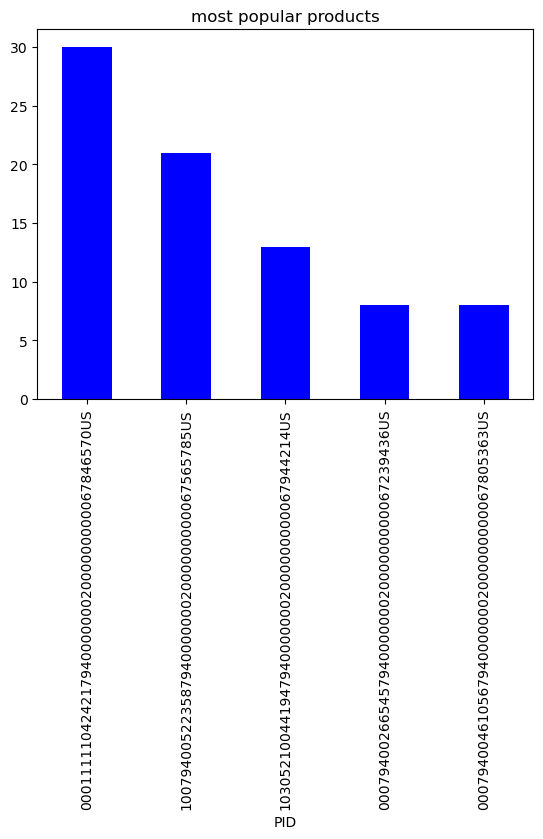

In [44]:
#most popular items
pop_item=train_data['PID'].value_counts().head()
pop_item.plot(kind='bar',color='blue')
plt.title('most popular products')


<Axes: xlabel='Ratings'>

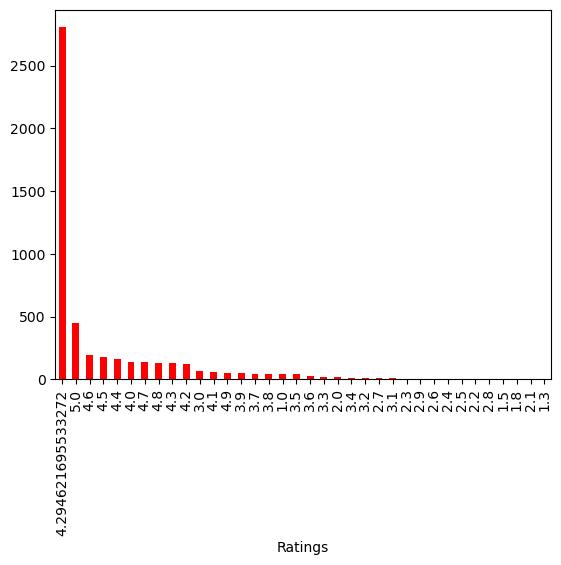

In [45]:
train_data['Ratings'].value_counts().plot(kind='bar',color='red')

<Axes: xlabel='Category'>

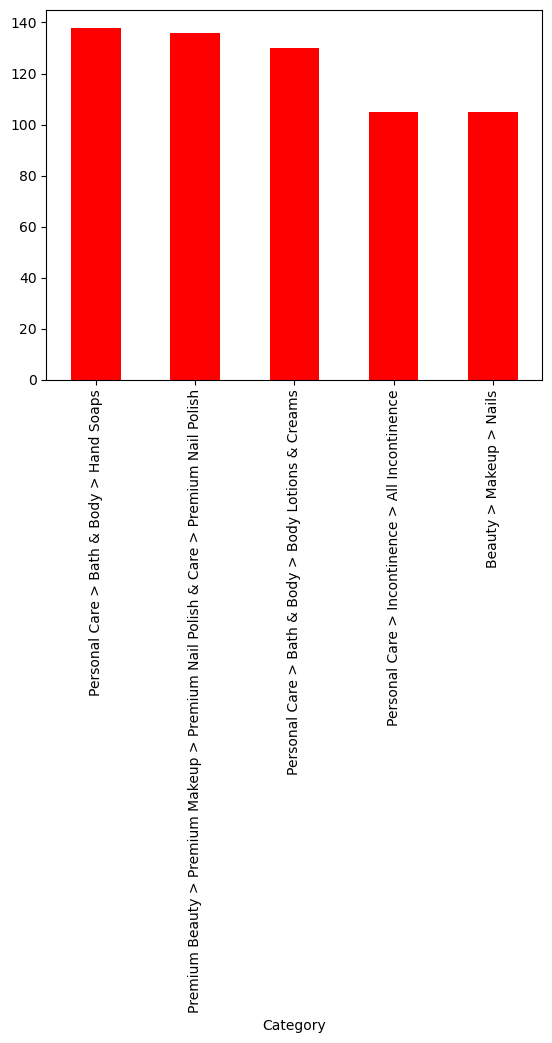

In [46]:
train_data['Category'].value_counts().head().plot(kind='bar',color='red')

In [47]:


train_data['Category'] = train_data['Category'].str.replace('>', ',')
train_data



,ID,PID,Brand,Category,Description,I Url,Tags,Ratings,R count
0,1.705737e+09,2e17bf4acecdece67fc00f07ad62c910,OPI,"Premium Beauty , Premium Makeup , Premium Nail...",,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",4.294622,571.035565
1,9.500000e+01,076e5854a62dd283c253d6bae415af1f,Nice'n Easy,"Beauty , Hair Care , Hair Color , Auburn Hair ...",Pack of 3 Pack of 3 for the UPC: 381519000201 ...,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"Nice 'n Easy Permanent Color, 111 Natural Medi...",4.294622,571.035565
2,8.000000e+00,8a4fe5d9c7a6ed26cc44d785a454b124,Clairol,"Beauty , Hair Care , Hair Color , Permanent Ha...",This Clairol Nice N Easy Permanent Color gives...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,Clairol Nice 'N Easy Permanent Color 7/106A Na...,4.500000,29221.000000
3,4.000000e+00,03b5fb878a33eadff8b033419eab9669,Kokie Cosmetics,"Beauty , Makeup , Lip",Calling all matte lip lovers! Indulge in our r...,https://i5.walmartimages.com/asr/25b4b467-bc61...,"Kokie Professional Matte Lipstick, Hot Berry, ...",4.294622,571.035565
4,9.900000e+02,ce3d761e57d6ccad80619297b5b1bcbc,Gillette,"Seasonal , Stock Up Essentials , Personal Care...","In 1971, Gillette introduced the Trac II razor...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"Gillette TRAC II Plus Razor Blade Refills, Fit...",4.294622,131.000000
...,...,...,...,...,...,...,...,...,...
4995,2.771000e+03,ad208aa8da338e84dfcf13efd49e8a75,Eclectic Lady,"Household Essentials , Air Fresheners , Spray ...","Garden Mint is a lovely blend of spearmint, le...",https://i5.walmartimages.com/asr/0e0416ae-6b70...,"Garden Mint Room Spray (Double Strength), 4 ou...",4.500000,2.000000
4996,0.000000e+00,1be8241fd6249f7ee007b06afd7ff45d,Garnier,"Beauty , Hair Care , Hair Color , Permanent Ha...",Garnier Nutrisse Nourishing Hair Color Creme B...,https://i5.walmartimages.com/asr/24d7a837-51f8...,Garnier Nutrisse Nourishing Hair Color Creme (...,3.900000,7484.000000
4997,3.400000e+01,96ed378fb9466b11abde8f9baea58844,Stoneway,"Beauty , Makeup , Nails",Multifunctional : Our nail drill kit come with...,https://i5.walmartimages.com/asr/d6202179-2c93...,"Nail File Electric Drill, 6 in 1 Professional ...",4.294622,4.000000
4998,9.000000e+00,f7b05869f3ee7fe22864ea58cbb006d1,Creed,"Premium Beauty , Premium Bath & Body , Premium...",,https://i5.walmartimages.com/asr/3dc99239-66d2...,Creed Love In Black Hair And Body Wash 6.8oz/2...,4.294622,571.035565


In [48]:
#Rating Based Reccomendation System

In [49]:
 average_ratings=train_data.groupby(["Category","I Url","R count","Brand"])["Ratings"].mean().reset_index()

In [50]:
top_rated_items=average_ratings.sort_values(by='Ratings',ascending=False)

In [51]:
rating_based_reccs=top_rated_items.head(10)

In [52]:
rating_based_reccs['Ratings']=rating_based_reccs['Ratings'].astype(int)
rating_based_reccs['R count']=rating_based_reccs['R count'].astype(int)
print("Rating Based Reccomendation System: ")
rating_based_reccs

Rating Based Reccomendation System: 


,Category,I Url,R count,Brand,Ratings
776,"Beauty , Makeup , Eye Makeup , Eye Shadow , Al...",https://i5.walmartimages.com/asr/05a2fa58-3d41...,1,Almay,5
3040,"Personal Care , Deodorants & Antiperspirants",https://i5.walmartimages.com/asr/ef9bbf6e-6ccd...,1,Sure,5
2955,"Personal Care , Bath & Body , Hand Soaps",https://i5.walmartimages.com/asr/fdf5474d-f71f...,2,PERMTX-LOCKT,5
2977,"Personal Care , Bath & Body , Loofahs, Bath Sp...",https://i5.walmartimages.com/asr/c2a4f9f1-0e3e...,2,Sage,5
1637,"Health , Aromatherapy , Essential Oils , Essen...",https://i5.walmartimages.com/asr/ca709f39-4dc0...,1,Healing Solutions,5
2989,"Personal Care , Deodorants & Antiperspirants",https://i5.walmartimages.com/asr/11a9210f-ced7...,1,Schmidt's,5
2994,"Personal Care , Deodorants & Antiperspirants",https://i5.walmartimages.com/asr/362363ae-06ad...,5,Teen Spirit,5
2999,"Personal Care , Deodorants & Antiperspirants",https://i5.walmartimages.com/asr/49694d47-bfaa...,3,Summer's Eve,5
342,"Beauty , Clearance and Rollback Beauty Product...",https://i5.walmartimages.com/asr/c3e000a7-2fab...,3,Equate Beauty,5
3002,"Personal Care , Deodorants & Antiperspirants",https://i5.walmartimages.com/asr/4e2d42e6-7f53...,1,Sure,5


In [53]:
#Content Based Reccomendation System

In [54]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
def content_based_reccs(train_data,item,topn=10):
    if item not in train_data['Tags'].values:
        print(f"item {item} is not present in the training data set")
        return pd.DataFrame()
    Tfidf_vectorizer=TfidfVectorizer(stop_words='english')
    tfidf_content=Tfidf_vectorizer.fit_transform(train_data['Tags'])
    matrix_content=cosine_similarity(tfidf_content,tfidf_content)
    index_item=train_data[train_data['Tags']==item].index[0]
    similer_items=list(enumerate(matrix_content[index_item]))
    similer_items=sorted(similer_items,key=lambda x :x[1],reverse=True)
    top_items=similer_items[1:topn+1]
    recc_index=[ x[0] for x in top_items]
    recc_details=train_data.iloc[recc_index][['Tags','Brand','R count']]
    return recc_details
Item='Kokie Professional Matte Lipstick, Hot Berry, 0.14 fl oz, Wal-mart, Walmart.com'
content=content_based_reccs(train_data,Item,topn=8)
content


,Tags,Brand,R count
546,"Kokie Professional Matte Lipstick, Kiss Me, 0....",Kokie Cosmetics,571.035565
3406,"Kokie Professional Matte Lipstick, Firecracker...",Kokie Cosmetics,571.035565
2873,Kokie Professional Lip Poudre Liquid Matte Liq...,Kokie Cosmetics,7.000000
4050,Kokie Professional Lip Poudre Liquid Matte Liq...,Kokie Cosmetics,7.000000
3023,"Be Matte Lipstick - Pink, Wal-mart, Walmart.com",City Color,2.000000
558,"Kokie Professional Nail Polish, Girls Night , ...",Kokie Cosmetics,6.000000
4920,"Kokie Professional Nail Polish, Jamacan Me Blu...",Kokie Cosmetics,6.000000
3620,"Kokie Professional Skin Perfect HD Foundation,...",Kokie Cosmetics,9.000000


In [55]:
#collaborative filtering 

In [56]:
def collaborative_filtering_reccs(train_data,target_user,top_n=10):
    user_item_matrix=train_data.pivot_table(index='ID',columns='PID',values='Ratings',aggfunc='mean').fillna(0).astype(int)
    user_similarity=cosine_similarity(user_item_matrix)
    target_index=user_item_matrix.index.get_loc(target_user)
    user_similarities=user_similarity[target_index]
    similer_user_indexes=user_similarities.argsort()[:-1][1:]
    reccomended_items=[]
    for user_index in similer_user_indexes:
        rated_by_similer_user=user_item_matrix.iloc[user_index]
        not_rated_by_targetuser=(rated_by_similer_user==0)& (user_item_matrix.iloc[target_index])
        reccomended_items.extend(user_item_matrix.columns[not_rated_by_targetuser][:top_n])
    reccomended_details=train_data[train_data['PID'].isin(reccomended_items)][['Tags','Ratings','Brand','I Url']]
    return reccomended_details
target_user_id=1
top_items=5

collab_rec=collaborative_filtering_reccs(train_data,target_user_id,top_items)
print(f'top {top_items} reccomendations for user no {target_user_id} are: ')
collab_rec.head(top_items)


top 5 reccomendations for user no 1 are: 


,Tags,Ratings,Brand,I Url
9,(3 pack) Vaseline Lip Therapy Tinted Lip Balm ...,4.294622,Vaseline,https://i5.walmartimages.com/asr/6fced36e-5459...
99,"Vaseline Lip Therapy, Advanced Formula Skin Pr...",4.294622,Vaseline,https://i5.walmartimages.com/asr/fad54675-368a...
275,Vagisil Anti-Itch Medicated Wipes 20 Each (Pac...,5.000000,Vagisil,https://i5.walmartimages.com/asr/9a7992bb-cab9...
684,Vaseline Lip Therapy Lip Balm Tin Rosy Lips 0....,4.400000,Vaseline,https://i5.walmartimages.com/asr/dd2343df-7302...
1190,"2 Pack - Vaseline Spray & Go Moisturizer, Coco...",4.300000,Vaseline,https://i5.walmartimages.com/asr/0852fddb-c1c1...


In [63]:
def hybrid_recommendations(train_data,target_user_id,item_name,top_n=10):
    content_based_rec=content_based_reccs(  train_data, item_name , top_n)
    collaborative_filtering_rec=collaborative_filtering_reccs( train_data , target_user_id , top_n)
    hybrid_rec=pd.concat([content_based_rec,collaborative_filtering_rec]).drop_duplicates()
    return hybrid_rec.head(10)
target=5
name='OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath, Wal-mart, Walmart.com'
hybrid_recommendations(train_data,target,name,top_n=10)

,Tags,Brand,R count,Ratings,I Url
4854,"OPI Infinite Shine Nail Polish, Dulce De Leche...",OPI,1.000000,NaN,NaN
3052,"OPI Nail Lacquer Nail Polish, Hawaiian Orchid,...",OPI,1.000000,NaN,NaN
4010,"OPI Nail Polish, Are We There Yet?, 0.5 Fl Oz,...",OPI,2.000000,NaN,NaN
4752,"OPI Infinite Shine Nail Polish, Let Love Spark...",OPI,3.000000,NaN,NaN
4356,"OPI Nail Lacquer Nail Polish, Go with the Lava...",OPI,1.000000,NaN,NaN
3967,"OPI Infinite Shine Nail Polish, Mini Scotland ...",OPI,1.000000,NaN,NaN
2952,"OPI Nail Lacquer Nail Polish, Miami Beet, Wal-...",OPI,571.035565,NaN,NaN
4966,OPI Nail GelColor + Infinite Shine Polish -TAU...,OPI,571.035565,NaN,NaN
3252,"OPI Nail Lacquer Nail Polish, Shorts Story, Wa...",OPI,1.000000,NaN,NaN
1257,OPI Nail GelColor + Infinite Shine Polish - PR...,OPI,571.035565,NaN,NaN
